In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
%matplotlib notebook

In [2]:
viajes=pd.read_csv('Encuesta_de_movilidad_de_Bogot__2015___Caracterizaci_n_viajes___Origen_Destino.csv')
coo_t=viajes[['MEDIO_PREDOMINANTE','LATITUD_ORIGEN', 'LATITUD_DESTINO', 'LONGITUD_ORIGEN','LONGITUD_DESTINO', 'DIFERENCIA_HORAS']].copy()
coo_t.dropna(inplace=True)

In [3]:
def to_time(x):
    T=[float(i) for i in x.split(':')]
    tiempo=T[0]+T[1]/60 + T[2]/3600
    return tiempo

def Earth_Dist(long1,lat1,long2,lat2):
        a1=math.radians(lat1)
        a2=math.radians(long1)
        b1=math.radians(lat2)
        b2=math.radians(long2)
        dlon= b2-a2
        dlat= b1-a1
        a = (math.sin(dlat/2))**2 + math.cos(a1) * math.cos(b1) * (math.sin(dlon/2))**2
        c = 2*math.atan2(math.sqrt(a), math.sqrt(1 - a))
        R = 6378.145
        d = R * c
        return d
    
def fix_lat(x):
    n='{:e}'.format(x)
    return x/(10**(int(n[-2:])))

def fix_lon(x):
    n='{:e}'.format(x)
    return x/(10**(int(n[-2:])-1))

In [4]:
coo_t['tiempo_recorrido']=coo_t['DIFERENCIA_HORAS'].apply(lambda x: to_time(x))
coo_t=coo_t[coo_t.tiempo_recorrido!=0.0].copy()
coo_t['LONGITUD_ORIGEN']=coo_t['LONGITUD_ORIGEN'].apply(lambda x: fix_lon(x))
coo_t['LATITUD_ORIGEN']=coo_t['LATITUD_ORIGEN'].apply(lambda x: fix_lat(x))
coo_t['LONGITUD_DESTINO']=coo_t['LONGITUD_DESTINO'].apply(lambda x: fix_lon(x))
coo_t['LATITUD_DESTINO']=coo_t['LATITUD_DESTINO'].apply(lambda x: fix_lat(x))

In [5]:
coo_t['distancia_km']=coo_t.apply(lambda x: Earth_Dist(x['LONGITUD_ORIGEN'],x['LATITUD_ORIGEN'], x['LONGITUD_DESTINO'],x["LATITUD_DESTINO"]),axis=1)

In [6]:
coo_t["velocidad km/h"]=coo_t.apply(lambda x: x["distancia_km"]/x["tiempo_recorrido"],axis=1)

In [23]:
# Filtrar distancias mayores al radio de bogota
# filtrar tiempos mayores a 5 horas
#coo_t.sort_values('distancia_km',ascending=False)

''

In [7]:
clean_data=coo_t[(coo_t.LATITUD_ORIGEN <=5.0) &  (coo_t.LATITUD_ORIGEN >= 3.0) 
      & (coo_t.LATITUD_DESTINO >=3.0) &  (coo_t.LATITUD_DESTINO >= 5.0)
     & (coo_t.LONGITUD_ORIGEN >=-75.0) &  (coo_t.LONGITUD_ORIGEN <= -73.5) 
      & (coo_t.LONGITUD_DESTINO >=-75.0) &  (coo_t.LONGITUD_DESTINO <= -73.5)]

In [8]:
clean_data=clean_data[clean_data['velocidad km/h']<=100.0]

<IPython.core.display.Javascript object>


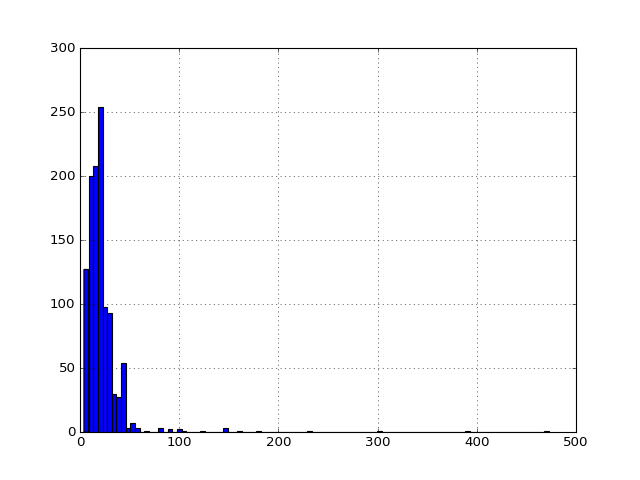

In [23]:
clean_data['velocidad km/h'].hist(bins=100,label='velocidad')

<IPython.core.display.Javascript object>


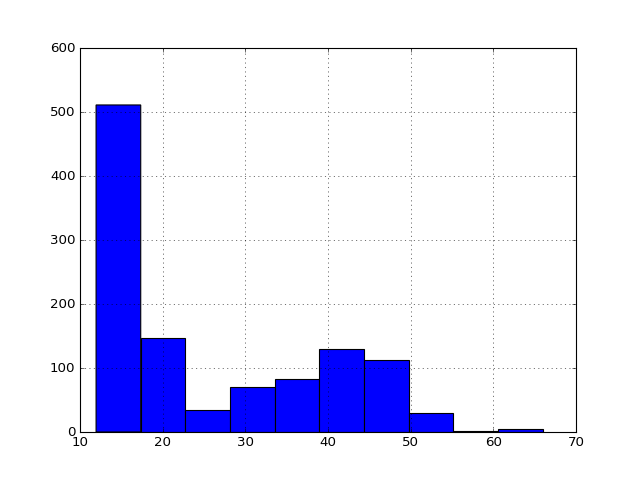

In [17]:
clean_data['distancia_km'].hist(bins=10)

<IPython.core.display.Javascript object>


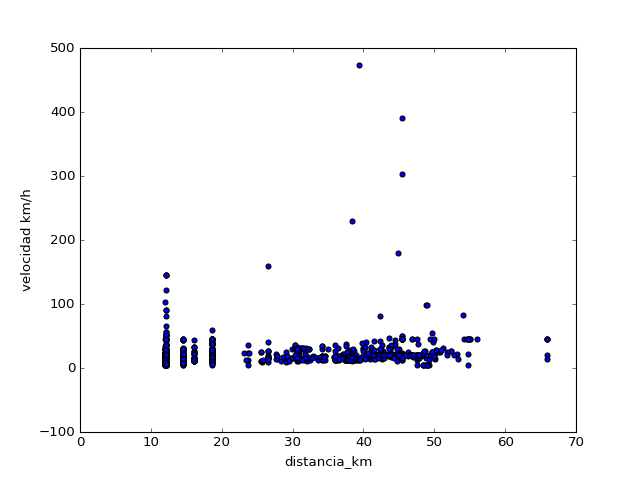

In [20]:
plt.figure()
plt.scatter(clean_data['distancia_km'],clean_data['velocidad km/h'])
plt.xlabel('distancia_km')
plt.ylabel('velocidad km/h')

In [10]:
clean_data.sort_values('velocidad km/h',ascending=False)

,MEDIO_PREDOMINANTE,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,tiempo_recorrido,distancia_km,velocidad km/h
141480,PEATON,4.594063,5.025215,-74.090513,-74.001107,00:30:00,0.500000,49.009604,98.019209
116079,PEATON,4.596098,5.025215,-74.094495,-74.001107,00:30:00,0.500000,48.879539,97.759078
133438,PEATON,4.919199,5.025215,-74.025764,-74.001107,00:08:00,0.133333,12.114401,90.858004
133174,PEATON,4.919199,5.025215,-74.025764,-74.001107,00:08:00,0.133333,12.114401,90.858004
53416,TPC-SITP,4.555495,5.025215,-74.122510,-74.001107,00:39:00,0.650000,53.995563,83.070097
78073,"BICICLETA, BICICLETA CON MOTOR",4.710242,5.025215,-74.214420,-74.001107,00:31:00,0.516667,42.298899,81.868837
140753,PEATON,4.919199,5.025215,-74.025764,-74.001107,00:09:00,0.150000,12.114401,80.762670
140805,PEATON,4.919199,5.025215,-74.025764,-74.001107,00:11:00,0.183333,12.114401,66.078548
126997,ESPECIAL,4.864857,5.025215,-74.047458,-74.001107,00:19:00,0.316667,18.576430,58.662410
133462,PEATON,4.919199,5.025215,-74.025764,-74.001107,00:13:00,0.216667,12.114401,55.912618


In [15]:
(clean_data.MEDIO_PREDOMINANTE.value_counts(normalize=True))*100

INTERMUNICIPAL                    24.460432
AUTO                              19.334532
Transmilenio                      17.086331
ESPECIAL                          13.039568
TPC-SITP                           9.892086
MOTO                               6.025180
PEATON                             5.665468
BICICLETA, BICICLETA CON MOTOR     2.787770
TAXI                               0.899281
ILEGAL                             0.539568
OTROS                              0.269784
Name: MEDIO_PREDOMINANTE, dtype: float64

In [16]:
clean_data.to_csv('clean_data.csv')